In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import pandas as pd

In [13]:
df = pd.read_csv("../datasets/Concrete_Data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [15]:
df.columns[:-1]

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [17]:
df.columns[-1]

'Concrete compressive strength(MPa, megapascals) '

#relationship between predicting variables and the response

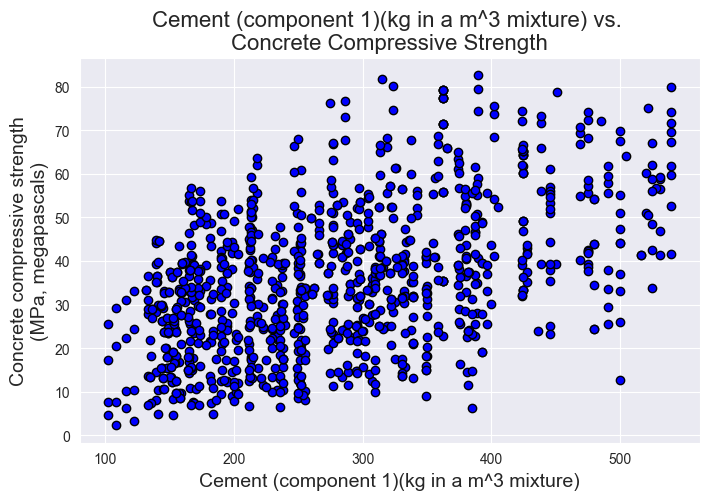

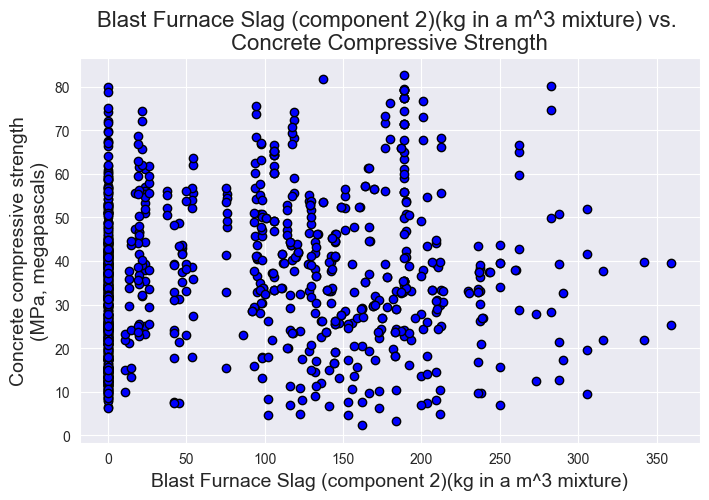

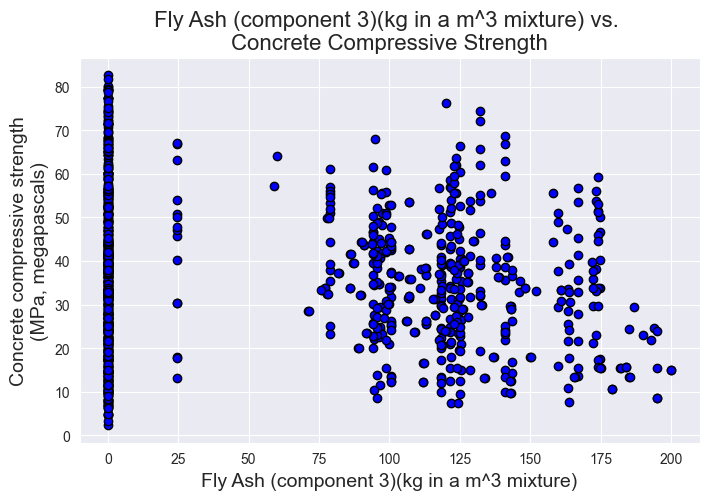

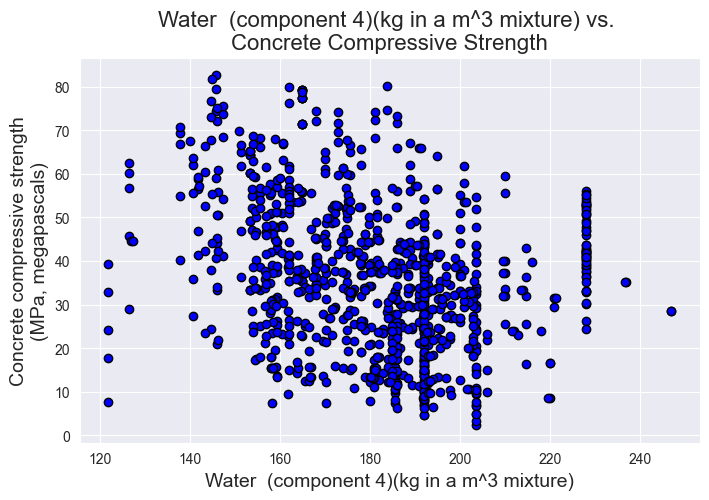

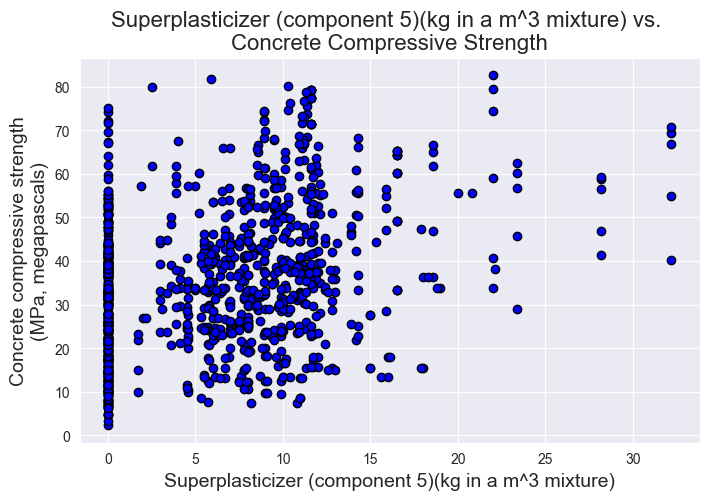

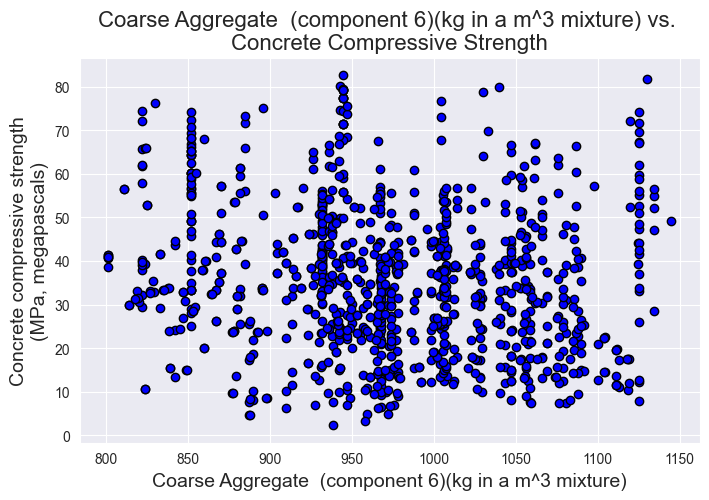

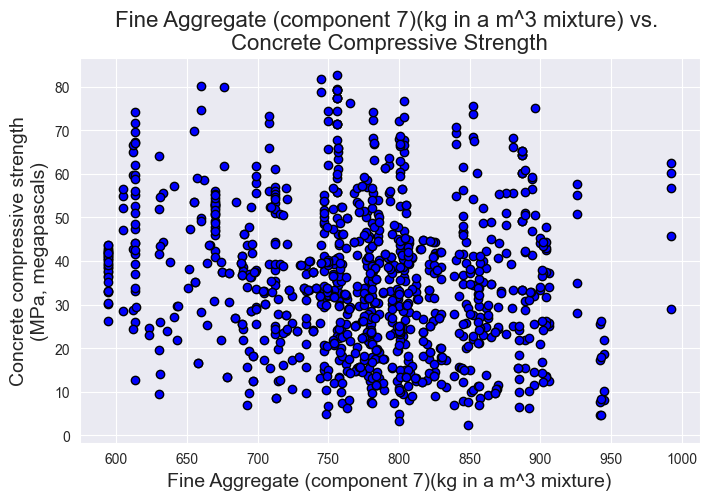

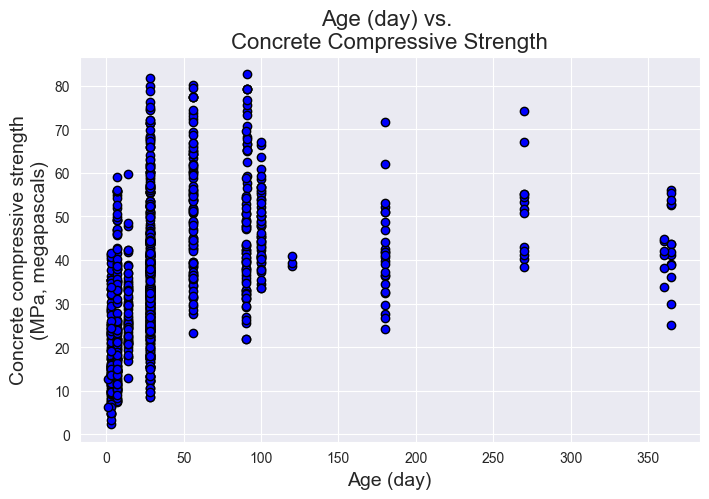

In [19]:
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nConcrete Compressive Strength".format(c),fontsize=16)
    plt.scatter(x=df[c],y=df[df.columns[-1]],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Concrete compressive strength\n(MPa, megapascals)',fontsize=14)
    plt.show()

In [20]:
df1=df.copy()

In [22]:
df1.columns=['Component'+str(i) for i in range(1,len(df.columns)-1)] + ['Age']+['y']

In [24]:
df1.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Age,y
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [25]:
from seaborn import pairplot

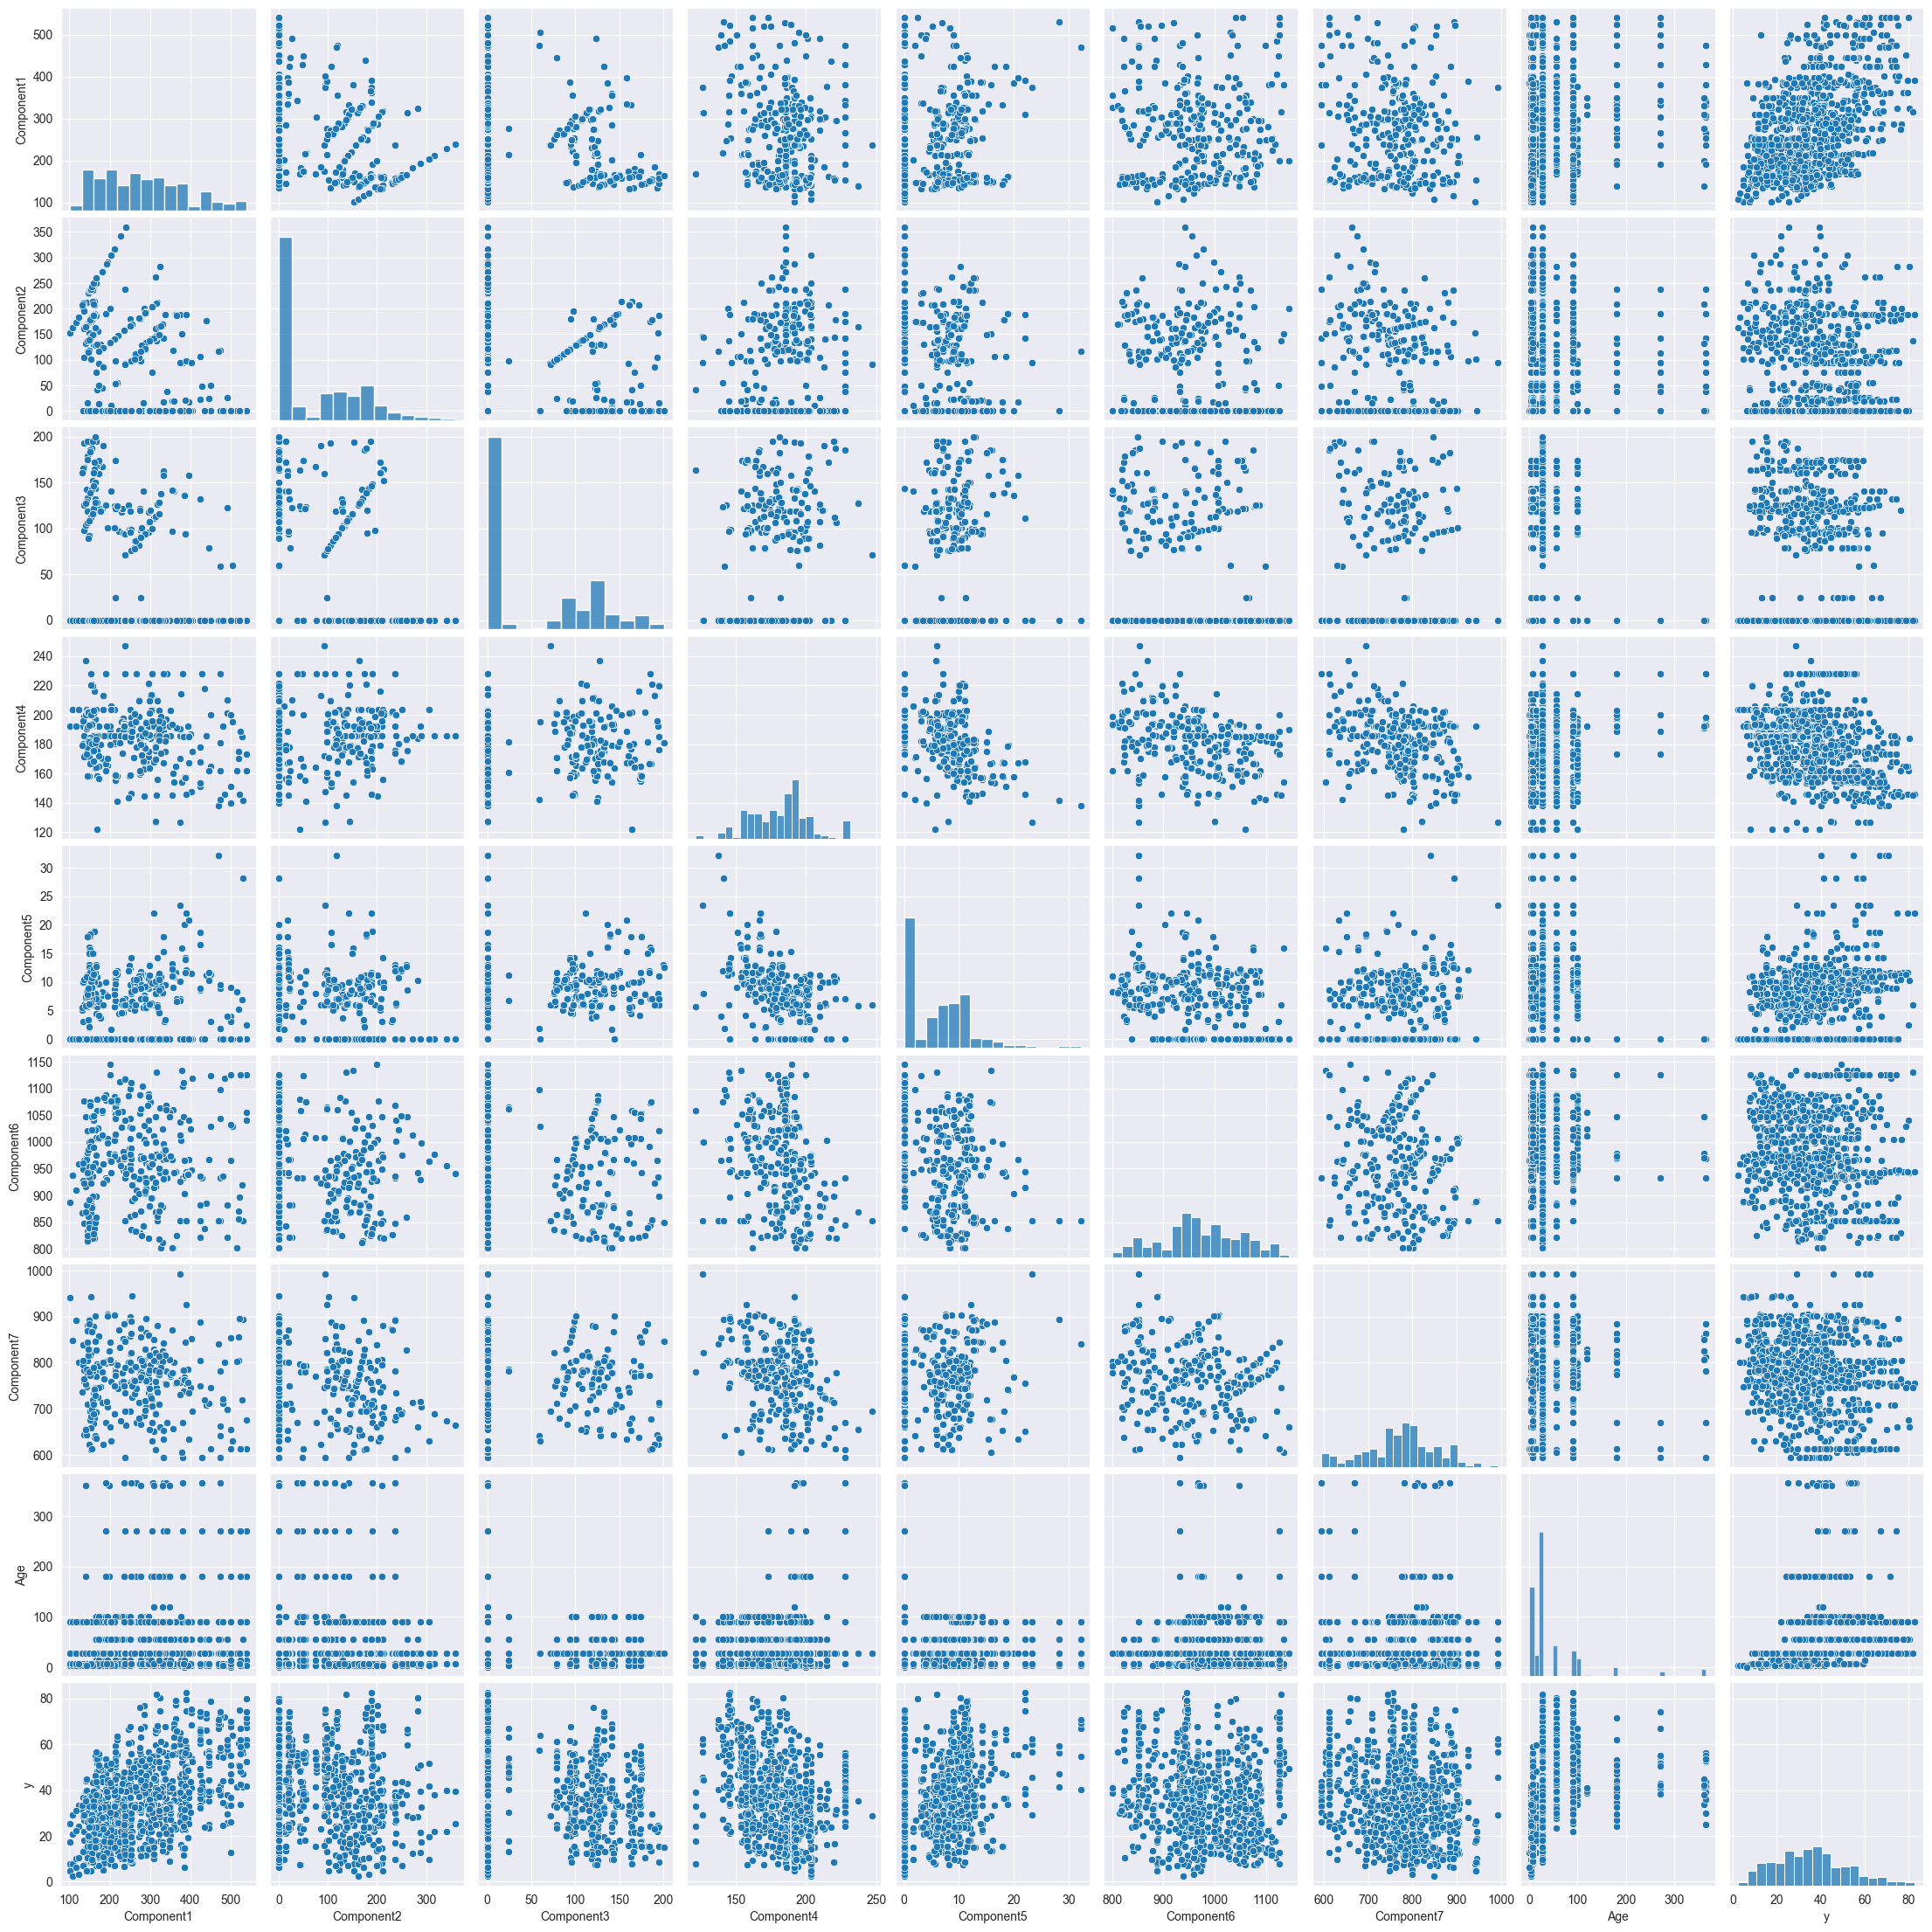

In [26]:
pairplot(df1)

In [27]:
corr = df1[:-1].corr()

In [28]:
corr

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Age,y
Component1,1.000000,-0.275175,-0.397431,-0.081452,0.092471,-0.109718,-0.222753,0.081898,0.497813
Component2,-0.275175,1.000000,-0.323730,0.107031,0.043156,-0.283862,-0.281574,-0.044166,0.134900
Component3,-0.397431,-0.323730,1.000000,-0.257428,0.377412,-0.009459,0.079170,-0.154285,-0.105689
Component4,-0.081452,0.107031,-0.257428,1.000000,-0.658186,-0.181326,-0.450710,0.277979,-0.289574
Component5,0.092471,0.043156,0.377412,-0.658186,1.000000,-0.265727,0.222770,-0.192613,0.366195
Component6,-0.109718,-0.283862,-0.009459,-0.181326,-0.265727,1.000000,-0.178857,-0.003398,-0.165372
Component7,-0.222753,-0.281574,0.079170,-0.450710,0.222770,-0.178857,1.000000,-0.156143,-0.167276
Age,0.081898,-0.044166,-0.154285,0.277979,-0.192613,-0.003398,-0.156143,1.000000,0.328837
y,0.497813,0.134900,-0.105689,-0.289574,0.366195,-0.165372,-0.167276,0.328837,1.000000


In [29]:
from statsmodels.graphics.correlation import plot_corr

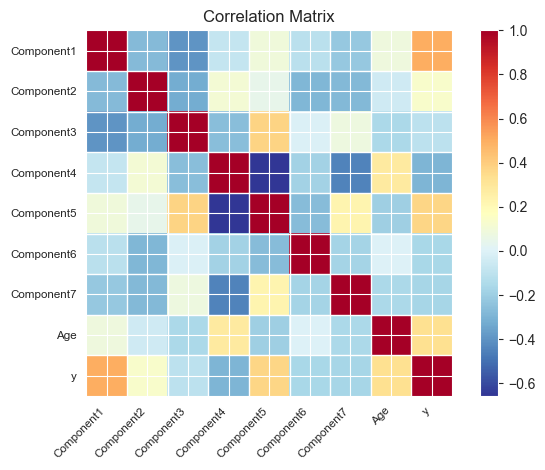

In [30]:
fig=plot_corr(corr,xnames=corr.columns)

In [32]:
formula_str = df1.columns[-1]+' ~ '+ '+'.join(df1.columns[:-1])
formula_str

'y ~ Component1+Component2+Component3+Component4+Component5+Component6+Component7+Age'

In [33]:
### Construct and fit the model.

In [34]:
model=sm.ols(formula=formula_str,data=df1)
fitted = model.fit()

In [35]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Fri, 21 Nov 2025   Prob (F-statistic):          6.29e-206
Time:                        19:56:40   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.3312     26.586     -0.878      0.3